In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

import math

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data['data'], columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['target'] = data['target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


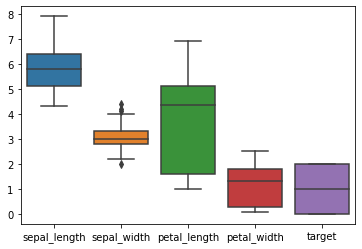

In [5]:
sns.boxplot(data=df);

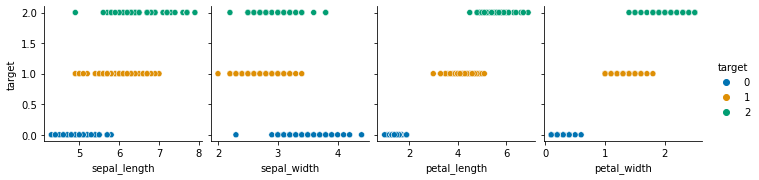

In [6]:
sns.pairplot(data=df, hue='target', palette='colorblind',
    x_vars=['sepal_length','sepal_width','petal_length','petal_width'], 
    y_vars=['target']);

In [7]:
# Quantile-based discretization function
for x in df.columns[:-1]:
    df[x] = pd.qcut(df[x], 3, labels=[1, 2, 3])

In [8]:
X = df.loc[:, ['sepal_length','sepal_width','petal_length','petal_width']]
y = df.target
print('X :', X.head(), sep='\n')
print('\ny :', y.head(), sep='\n')

X :
  sepal_length sepal_width petal_length petal_width
0            1           3            1           1
1            1           2            1           1
2            1           2            1           1
3            1           2            1           1
4            1           3            1           1

y :
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [9]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
clf = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
clf = clf.fit(X_train, y_train)

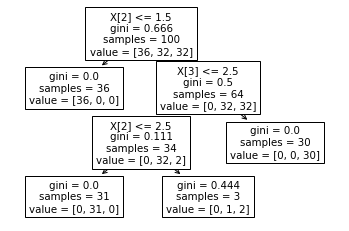

In [10]:
tree.plot_tree(clf);

In [11]:
y_test_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.96

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  0, 18]], dtype=int64)

## Building decision tree classifier from scratch

Converting the dataframe into a numpy array for further computations. Here, the first 4 columns are the features and  the last column is the target variable.

In [13]:
df_np = df.to_numpy()
df_np[:5]

array([[1, 3, 1, 1, 0],
       [1, 2, 1, 1, 0],
       [1, 2, 1, 1, 0],
       [1, 2, 1, 1, 0],
       [1, 3, 1, 1, 0]], dtype=int64)

First of all, let us define a function to calculate the different parameters given the feature to split on.

In [14]:
def calculate_entropy(df_np, feature_ix, target_ix):

    # before splitting
    uniq, cnts = np.unique(df_np[:,target_ix], return_counts=True)
    sum_grp = sum(cnts)
    entropy_before = 0
    for cnt in cnts:
        entropy_before -= (cnt / sum_grp) * math.log2(cnt / sum_grp)

    # now doing splitting
    cnts_list = []
    for x in np.unique(df_np[:,feature_ix]):
        # extract rows from df_np based on feature column value
        df_np_grp = df_np[df_np[:,feature_ix] == x]

        # get counts of target variable in that subset of rows
        uniq, cnts = np.unique(df_np_grp[:,target_ix], return_counts=True)
        cnts_list.append(cnts)

    # example cnts_list
    # [ array([ 2, 34, 21], dtype=int64), 
    #   array([15, 14, 21], dtype=int64), 
    #   array([33,  2,  8], dtype=int64)]

    # total sum of all elements in cnts_list
    tot_cnt = np.sum([np.sum(cnts) for cnts in cnts_list])

    # calculation of entropy for each group
    entropies = []
    for cnts in cnts_list:
        # example cnts
        # [ 2, 34, 21]
        sum_grp = sum(cnts)
        e = 0
        for cnt in cnts:
            e -= (cnt / sum_grp) * math.log2(cnt / sum_grp)
        entropies.append({e, sum_grp})

    # sample entropies
    # [{1.1449531285355223, 57}, {1.5609563153489607, 50}, {0.9503343840316569, 43}]
    entropy_after = sum([x*y for x,y in entropies]) / tot_cnt

    # calculation of information gain
    info_gain = entropy_before - entropy_after

    # split info calculation
    split_info = sum([-y/tot_cnt * math.log2(y/tot_cnt) for x,y in entropies])

    # gain ratio calculation
    gain_ratio = info_gain / split_info

    return {
        'feature_ix' : feature_ix,
        'entropy_before' : entropy_before, 
        'entropy_after' : entropy_after,
        'info_gain' : info_gain, 
        'split_info' : split_info,
        'gain_ratio' : gain_ratio, 
    }

In [15]:
class Tree:
    def __init__(self, data, features):
        self.children = dict()
        self.data = data
        self.features = features
        self.split_on = None
        self.is_leaf = False
        self.output_class = None
        self.parent = None
        self.constval = None

    def __repr__(self):
        return str(self.parent.split_on) + ' = ' + str(self.constval) + ' with ' + str(len(self.data)) + ' instances.'

    def __str__(self):
        return str(self.parent.split_on) + ' = ' + str(self.constval) + ' with ' + str(len(self.data)) + ' instances.'

In [16]:
m = len(df_np)
n = len(df_np[0])
root = Tree(df_np, features = ['sepal_length','sepal_width','petal_length','petal_width'])

In [17]:
options = [calculate_entropy(df_np, i, 4) for i in range(4)]
options

[{'feature_ix': 0,
  'entropy_before': 1.584962500721156,
  'entropy_after': 0.9380118568658498,
  'info_gain': 0.6469506438553063,
  'split_info': 1.1029626864055775,
  'gain_ratio': 0.5865571445246625},
 {'feature_ix': 1,
  'entropy_before': 1.584962500721156,
  'entropy_after': 1.2278301507155602,
  'info_gain': 0.35713235000559584,
  'split_info': 1.5755058588404358,
  'gain_ratio': 0.2266778939612725},
 {'feature_ix': 2,
  'entropy_before': 1.584962500721156,
  'entropy_after': 0.2602987255764425,
  'info_gain': 1.3246637751447135,
  'split_info': 1.58188145993464,
  'gain_ratio': 0.8373976234600068},
 {'feature_ix': 3,
  'entropy_before': 1.584962500721156,
  'entropy_after': 0.21559343576476128,
  'info_gain': 1.3693690649563948,
  'split_info': 1.584192858051291,
  'gain_ratio': 0.864395428875276}]

In [18]:
def split_data(node, target_ix, no_of_features):
    classes_present, cnts = np.unique(node.data[:,target_ix], return_counts=True)
    print('\n== Node ==')
    print(len(node.data), 'instances')
    print(dict(zip(classes_present, cnts)))

    if no_of_features == 0:
        node.is_leaf = True
        node.output_class = classes_present[np.argmax(cnts)]
        print(node.parent.split_on, ' = ', node.constval)
        print('o/p ->', node.output_class)
        return

    if len(classes_present) <= 1:
        node.is_leaf = True
        node.output_class = classes_present[0]
        print(node.parent.split_on, ' = ', node.constval)
        print('o/p ->', node.output_class)
        return

    options = [calculate_entropy(node.data, i, target_ix) for i in range(no_of_features)]
    min_split = max(options, key=lambda x:x['gain_ratio'])

    if np.isnan(min_split['gain_ratio']):
        node.is_leaf = True
        print(node.parent.split_on, ' = ', node.constval)
        node.output_class = classes_present[np.argmax(cnts)]
        print('o/p ->', node.output_class)
        return    
    
    feature_ix = min_split['feature_ix']
    node.split_on = node.features[feature_ix]
    print('split on -> ', node.split_on)
    print('gain ratio -> ', min_split['gain_ratio'])
    
    for x in np.unique(node.data[:,feature_ix]):
        # extract rows from data based on feature column value
        data_grp = node.data[node.data[:,feature_ix] == x]
        data_grp = np.delete(data_grp, feature_ix, axis=1)
        node.children[x] = Tree(data_grp,
            features=np.delete(node.features, feature_ix))
        node.children[x].parent = node
        node.children[x].constval = x
        split_data(node.children[x], target_ix - 1, no_of_features - 1)

In [19]:
split_data(root, 4, 4)


== Node ==
150 instances
{0: 50, 1: 50, 2: 50}
split on ->  petal_width
gain ratio ->  0.864395428875276

== Node ==
50 instances
{0: 50}
petal_width  =  1
o/p -> 0

== Node ==
52 instances
{1: 48, 2: 4}
split on ->  petal_length
gain ratio ->  0.7047053549400564

== Node ==
47 instances
{1: 47}
petal_length  =  2
o/p -> 1

== Node ==
5 instances
{1: 1, 2: 4}
split on ->  sepal_length
gain ratio ->  0.1009873363238911

== Node ==
4 instances
{1: 1, 2: 3}
sepal_length  =  2
o/p -> 2

== Node ==
1 instances
{2: 1}
sepal_length  =  3
o/p -> 2

== Node ==
48 instances
{1: 2, 2: 46}
split on ->  petal_length
gain ratio ->  0.03719988563071618

== Node ==
7 instances
{1: 1, 2: 6}
split on ->  sepal_width
gain ratio ->  0.20108786369811488

== Node ==
4 instances
{2: 4}
sepal_width  =  1
o/p -> 2

== Node ==
3 instances
{1: 1, 2: 2}
sepal_width  =  2
o/p -> 2

== Node ==
41 instances
{1: 1, 2: 40}
split on ->  sepal_width
gain ratio ->  0.018339144813688375

== Node ==
14 instances
{2: 14}
s